# FitBit Time Series Analysis
*by Brandon Martinez*

---

#### Set up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Acquisition
> Read in the data to work with

#### Read data: CSV --> Pandas DataFrame

In [2]:
df = pd.read_csv('fitbit/fitbit_time_series.csv')
df.head(3)

Date Calories Burned  Steps  Distance  Floors Minutes Sedentary  \
0  2018-04-26           2,635  2,931      1.38     2.0             1,347   
1  2018-04-27           3,649  9,971      4.70    19.0             1,158   
2  2018-04-28           3,379  3,521      1.66     2.0               702   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                    93.0                    0.0                  0.0   
1                   219.0                   46.0                 17.0   
2                   155.0                   22.0                 11.0   

  Activity Calories  
0               566  
1             1,752  
2             1,124

#### Initial Data Summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    247 non-null    object 
 1   Calories Burned         225 non-null    object 
 2   Steps                   225 non-null    object 
 3   Distance                225 non-null    float64
 4   Floors                  225 non-null    float64
 5   Minutes Sedentary       225 non-null    object 
 6   Minutes Lightly Active  225 non-null    float64
 7   Minutes Fairly Active   225 non-null    float64
 8   Minutes Very Active     225 non-null    float64
 9   Activity Calories       225 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.4+ KB


<div class="alert alert-block alert-info">
<b>Acquisition Takeaways</b>
    <li> Date needs to be converted to datetime type. </li>
    <li> Missing values need to be dropped (22). These contain the last two weeks that need to be predicted by a model.</li>
    <li> Columns/Features need to be lowercases and spaces replaces by underscore for best practice and easy reading/writing.</li>
    <li> Data types need to be corrected since all variables seem to be numberical so integer or float types.</li>
    </div>

---
# Preparation
> Clean and preprocess the data to explore + model

In [4]:
from wrangle import prep_fitbit, split_fitbit, visualize_split

#### Data Cleaning + Preprocessing
`prep_fitbit`: This function reads in the data from a csv to a dataframe, then cleans and prepares it for exploration.

In [5]:
df = prep_fitbit()
df.head(3)

calories_burned  steps  distance  floors  minutes_sedentary  \
date                                                                      
2018-04-26             2635   2931      1.38     2.0               1347   
2018-04-27             3649   9971      4.70    19.0               1158   
2018-04-28             3379   3521      1.66     2.0                702   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   

            minutes_very_active  activity_calories  month   weekday  
date                                                                 
2018-04-26                  0.0                566      4  Thursday  
2018-04-27                 17.0               1752      4    Friday  
2018-04-28                 11.0               1124      4  Saturday

#### Split the data for Exploration
- `split_fitbit`: Splits the DataFrame into 50% train, 30% validate, and 20% test.

- `visualize_split`: Plots split for each variable.

In [6]:
train, validate, test = split_fitbit(df)
train.shape, validate.shape, test.shape

((112, 11), (67, 11), (46, 11))

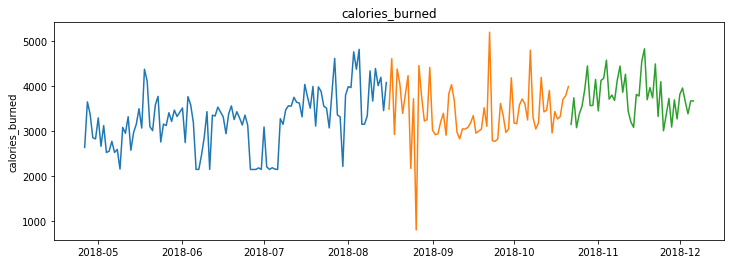

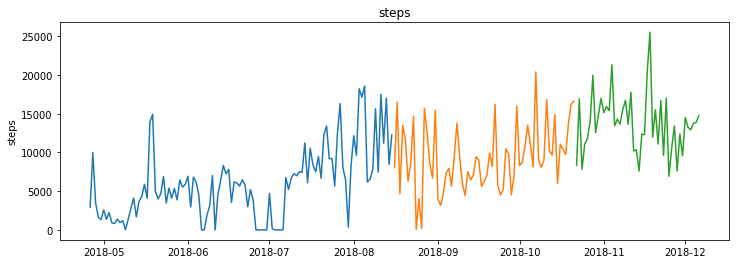

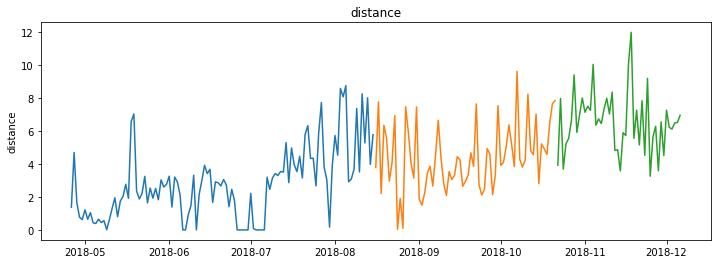

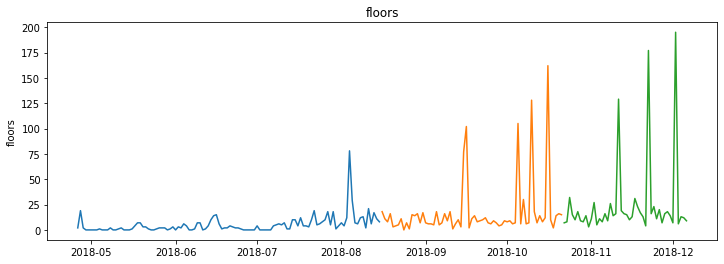

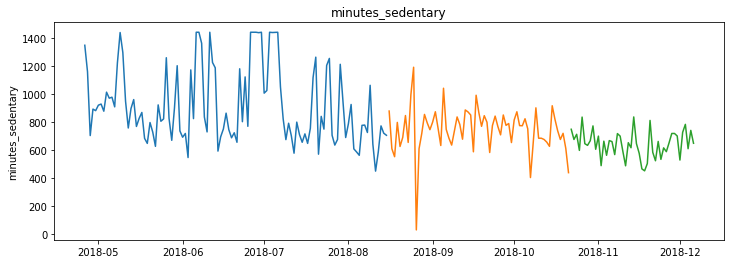

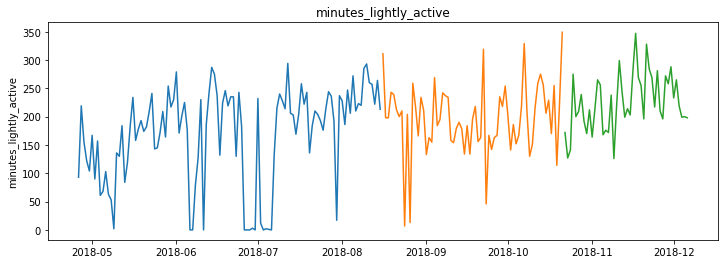

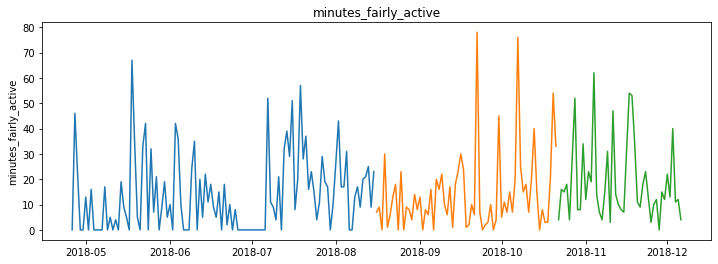

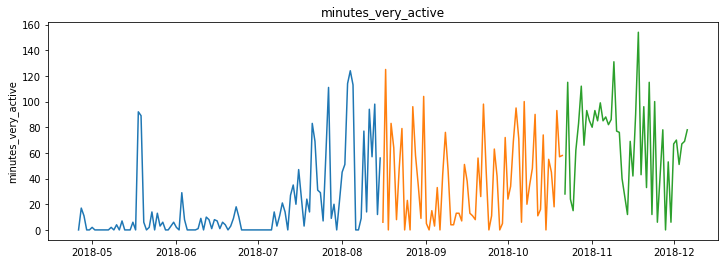

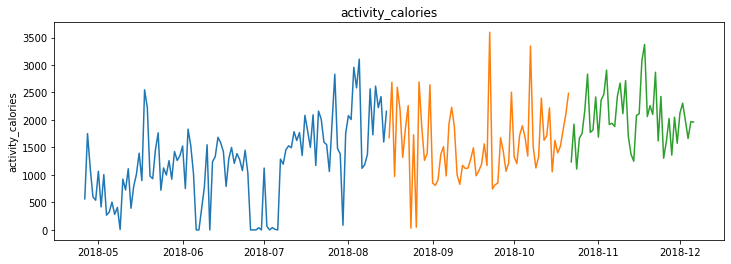

In [7]:
visualize_split(train, validate, test)

<div class="alert alert-block alert-info">
<b>Preparation Takeaways</b>
    <li> All variables are continous. </li>
    <li> We have 9 variables total.</li>
    <li> There are 225 observations.</li>
    <li> Each observation contain the metrics for one day.</li>
    <br>
<b>Preprocessing Takeaways</b>
    <li> Created <i>month</i> and <i>weekday</i> features. </li>
    <li> Split the data into train, validate and test.</li>
    <li> There are 225 observations.</li>
    <li> Visualized the split.</li>
    </div>

---
# Exploration
>Find patterns and draw conclusions on the user of this FitBit device

In [8]:
from explore import plot_dist, plot_avg_monthly, plot_avg_weekday, boxplot_weekday

#### Distribution of each Variable
`plot_dist`: This function plots the histograms for each of the 9 target variables in the fitbit dataset.

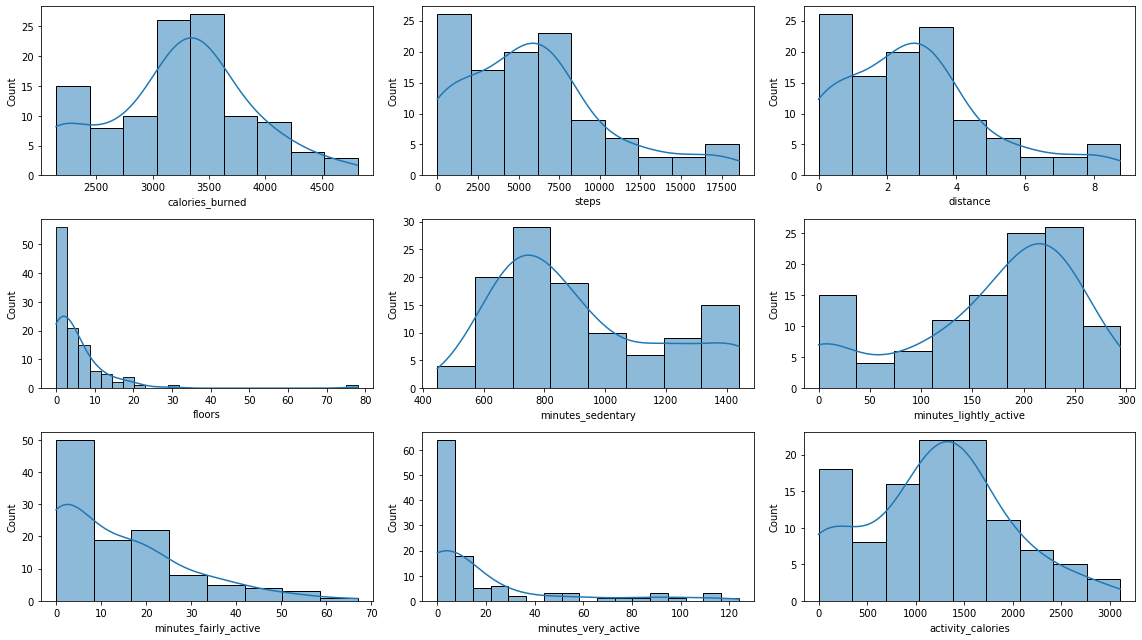

In [9]:
plot_dist(train)

Feature Distributions
- Nearly Normal: 
    - `calories_burned` 
    - `minutes_sedentary`
    - `minutes_lightly_active`
    - `activity_calories`
- Skewed Right:
    - `steps`
    - `distance`
    - `floors`
    - `minutes_fairly_active`
    - `minutes_very_active`
- `day` and `month` are omitted since they are not target variables to be predicted

#### Visualize Average for Targets by Month
`plot_avg_monthly`: This function plots the average for each of the 9 target variables in the fitbit dataset for each month.

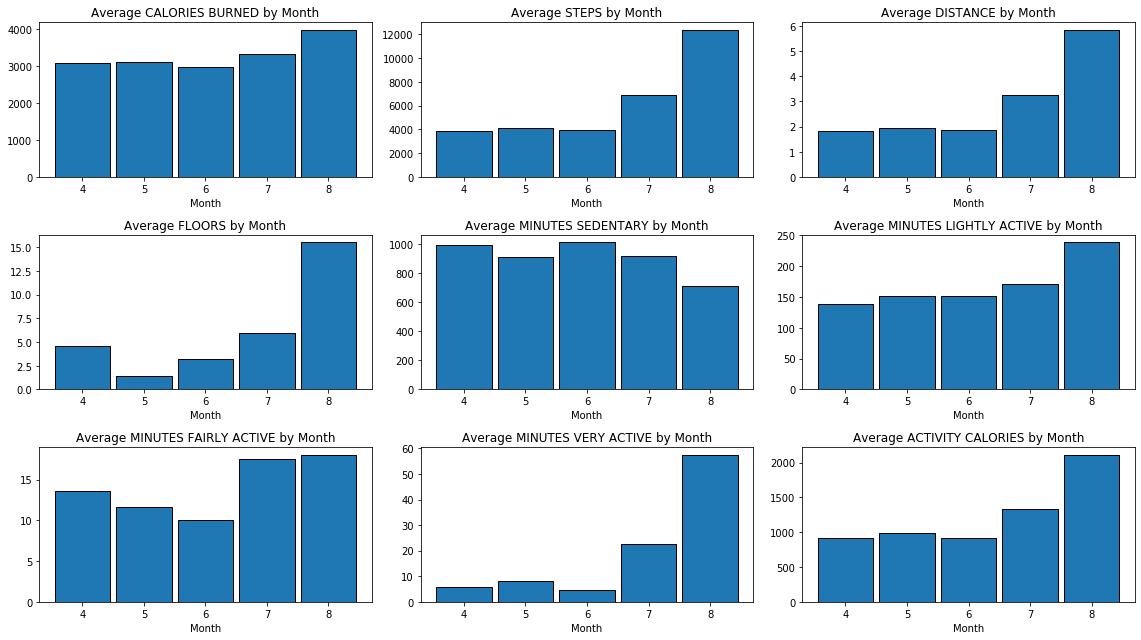

In [10]:
plot_avg_monthly(train)

#### Visualize Average for Targets by Weekday
`plot_avg_weekday`: This function plots the average for each of the 9 target variables in the fitbit dataset for each day of the week

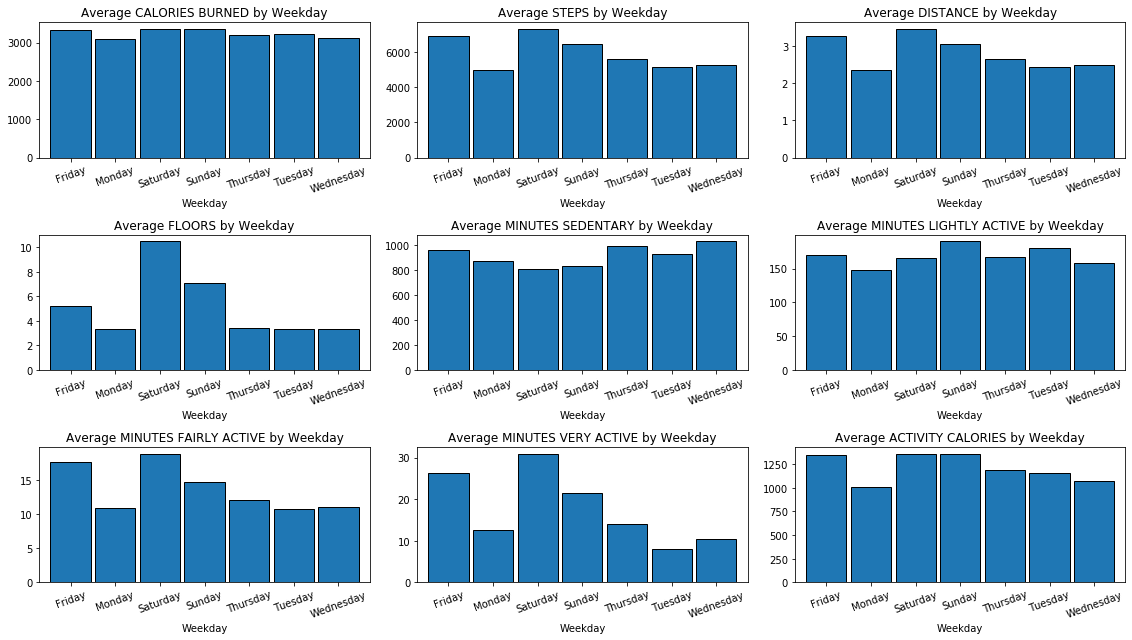

In [11]:
plot_avg_weekday(train)

#### Boxplot for Targets by Weekday
`boxplot_weekday`: This function plots the average for each of the 9 target variables in the fitbit dataset for each day of the week

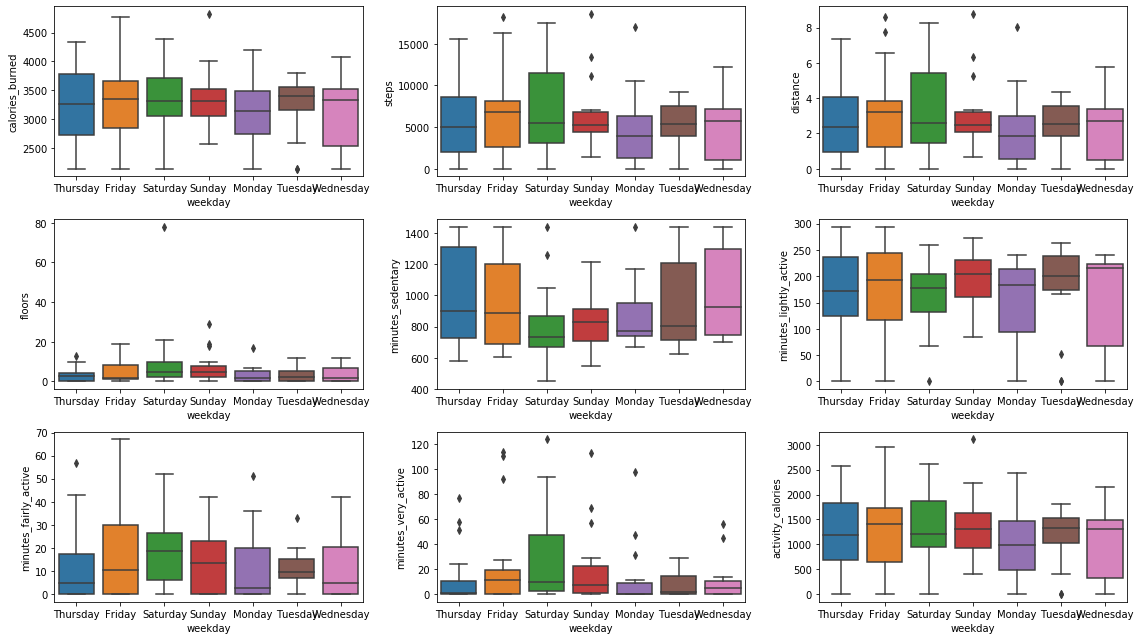

In [12]:
boxplot_weekday(train)

<div class="alert alert-block alert-info">
<b>Categorical Variable Takeaways</b><br>
1. Month
    <li> `steps`, `distance`, and `activity_calories` have a very similar distribution.</li>
    <li> `calories_burned` is greatest in August, lowest in June.</li>
    <li> `floors` are highest in September, lowest in May.</li>
    <li> All 'active' features are highest in July/August.</li>
<br>
2. Weekday
    <li> Most calories are burned on Saturday then Friday, but pretty consistent throughout the week. The same can be said for `distance`, `steps` and `activity_calories`.</li>
    <li> The distribution is very similar among `floors` and `minutes fairly active`. These are prominent on the weekends (Friday-Sunday) with peaks on Saturday.</li>
    <li> `minutes_sedentary` is highest mid-week.</li>
    <li> Not very active monday-thursday.</li>

---
# Modeling
> Forecasting: Predict the next two weeks of activity from 12/07/18 - 12/21/18

In [13]:
from model import evaluate, plot_and_eval, append_eval_df, make_predictions

#### Create an empty DataFrame for evaluation purposes

In [14]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

#### Drop categorical columns (only useful for visuals)

In [15]:
df.drop(columns=['month', 'weekday'], inplace=True)
train.drop(columns=['month', 'weekday'], inplace=True)
validate.drop(columns=['month', 'weekday'], inplace=True)
test.drop(columns=['month', 'weekday'], inplace=True)

## Single Value Models
---

In [16]:
from model import last_observed_value, simple_avg, moving_avg

### Last Observed Value
The simplest method for forecasting is to predict all future values to be the last observed value.

#### Make Predictions
Use the model to predict on validate data
- `last_observed_value`: This function stores Last Observed Value in a dictionary. 
    Keys are target variables, values are the Last Observed Value.
- `make_predictions`: This function creates yhat_df, the dataframe that contains the predictions on the validate dataset.

In [17]:
d = last_observed_value(train)
yhat_df = make_predictions(d, validate)
yhat_df.head(2)

calories_burned  steps  distance  floors  minutes_sedentary  \
date                                                                      
2018-08-16             4079  12259      5.78     8.0                704   
2018-08-17             4079  12259      5.78     8.0                704   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-08-16                   213.0                   23.0   
2018-08-17                   213.0                   23.0   

            minutes_very_active  activity_calories  
date                                                
2018-08-16                 56.0               2158  
2018-08-17                 56.0               2158

#### Plot Actual vs. Predicted Values
For each target variable
- `plot_and_eval`: This function will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
- `evaluate`: This function will compute the RMSE for each model.

calories_burned -- RMSE: 921


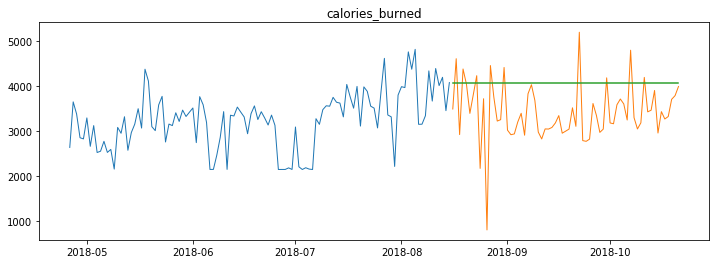

steps -- RMSE: 5156


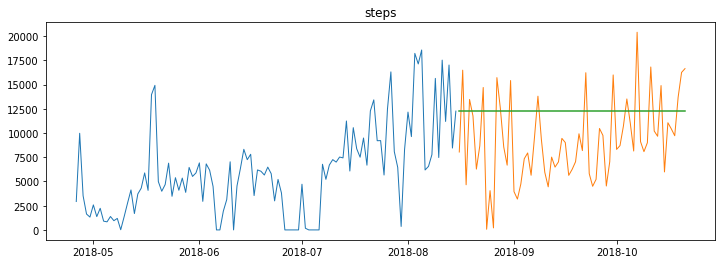

distance -- RMSE: 2


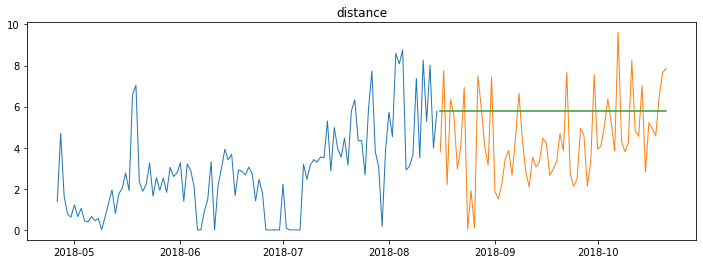

floors -- RMSE: 31


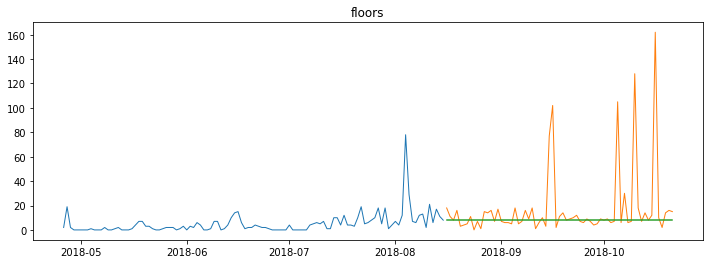

minutes_sedentary -- RMSE: 163


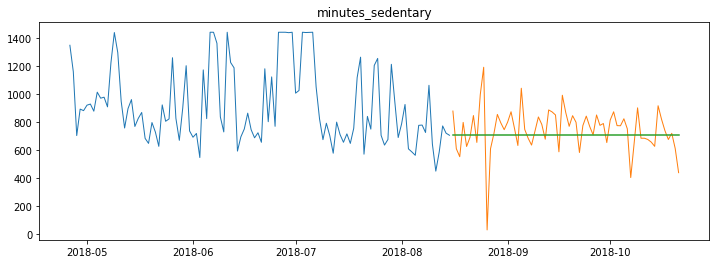

minutes_lightly_active -- RMSE: 64


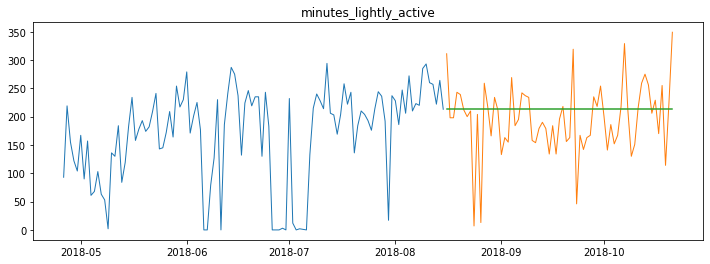

minutes_fairly_active -- RMSE: 18


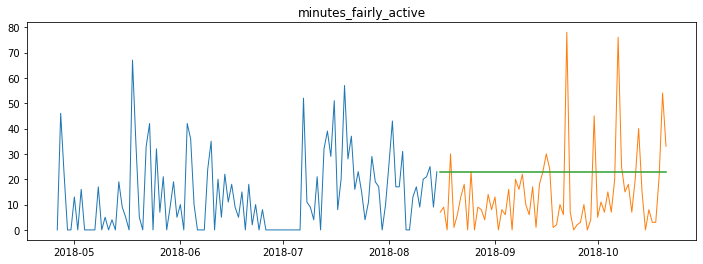

minutes_very_active -- RMSE: 38


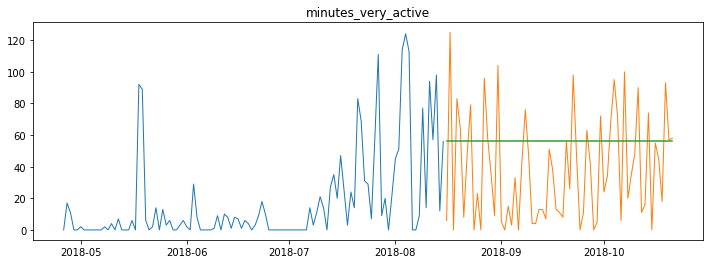

activity_calories -- RMSE: 897


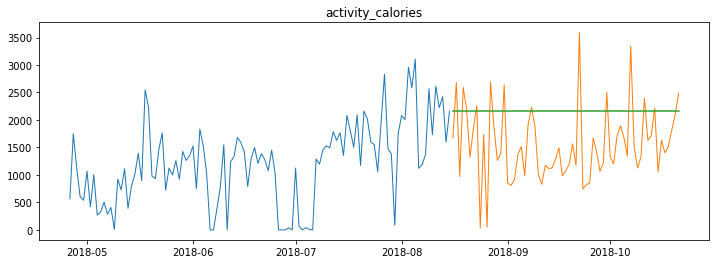

In [18]:
for col in train.columns:
    plot_and_eval(train, validate, yhat_df, col)

#### Evaluate
Evaluate using rmse for each variable in a dataframe that we will update with other models
- `append_eval_df`: This function will store rmse in the eval_df for comparison purposes.

In [19]:
for col in train.columns:
    eval_df = append_eval_df(eval_df, validate, yhat_df, model_type = 'last_observed_value', 
                             target_var = col)

---
### Simple Average
Take the simple average of historical values and use that value to predict future values.

*This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train.*

#### Make Predictions
- `simple_avg`: This function stores Simple Average in a dictionary. Keys are target variables, values are the Simple Average.
- `make_predictions`: This function creates yhat_df, the dataframe that contains the predictions on the validate dataset.

In [20]:
d = simple_avg(train)
yhat_df = make_predictions(d, validate)
yhat_df.head(2)

calories_burned    steps  distance  floors  minutes_sedentary  \
date                                                                        
2018-08-16           3246.8  5962.52      2.81    5.18             916.93   
2018-08-17           3246.8  5962.52      2.81    5.18             916.93   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-08-16                  168.45                  13.78   
2018-08-17                  168.45                  13.78   

            minutes_very_active  activity_calories  
date                                                
2018-08-16                17.66            1212.98  
2018-08-17                17.66            1212.98

#### Plot Actual vs. Predicted Values
For each target variable
- `plot_and_eval`: This function will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
- `evaluate`: This function will compute the RMSE for each model.

calories_burned -- RMSE: 658


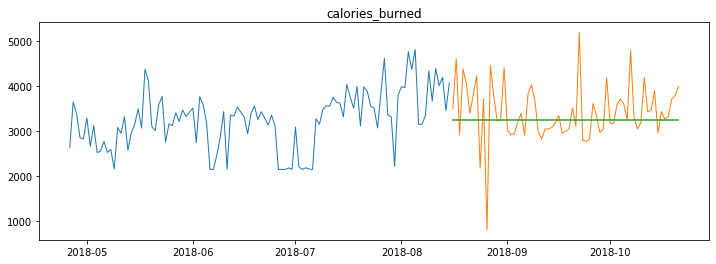

steps -- RMSE: 5356


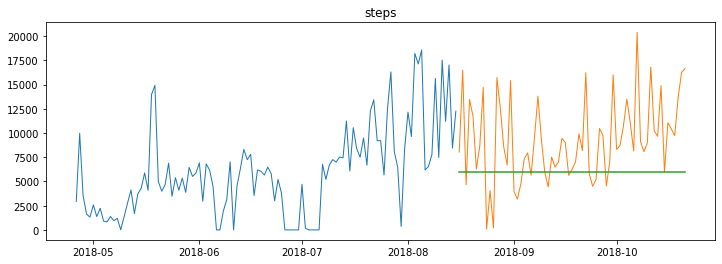

distance -- RMSE: 3


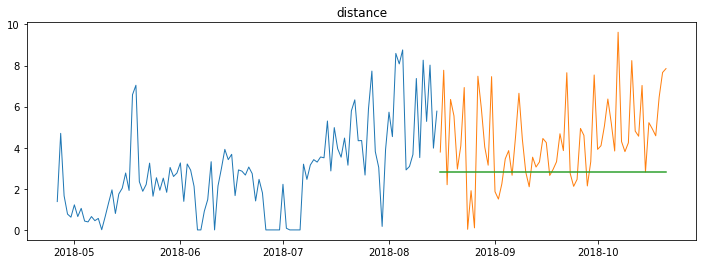

floors -- RMSE: 32


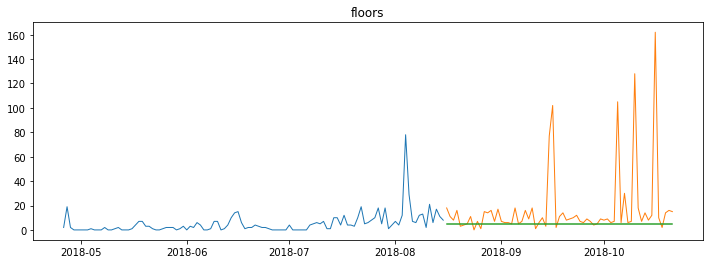

minutes_sedentary -- RMSE: 233


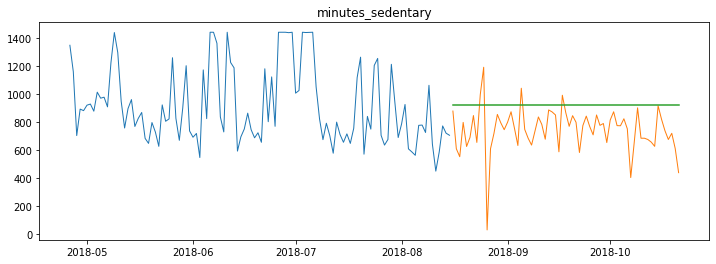

minutes_lightly_active -- RMSE: 68


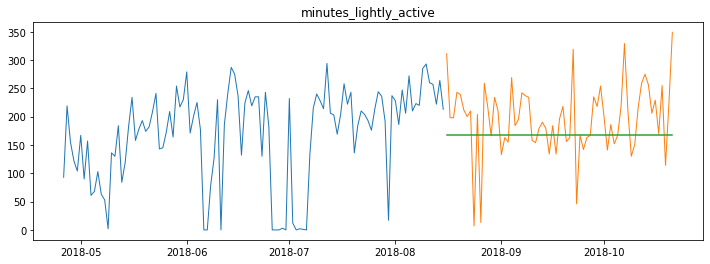

minutes_fairly_active -- RMSE: 16


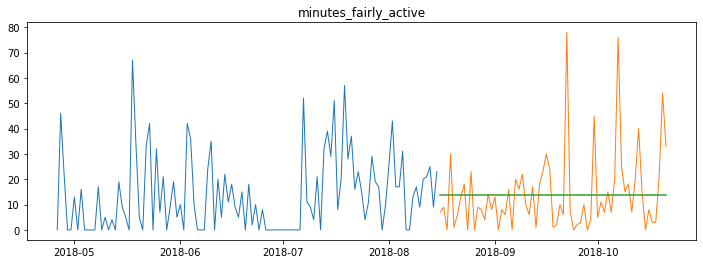

minutes_very_active -- RMSE: 39


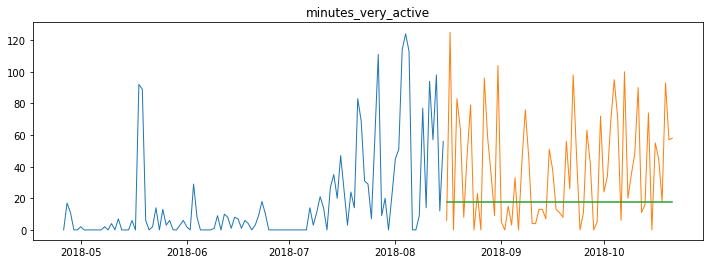

activity_calories -- RMSE: 746


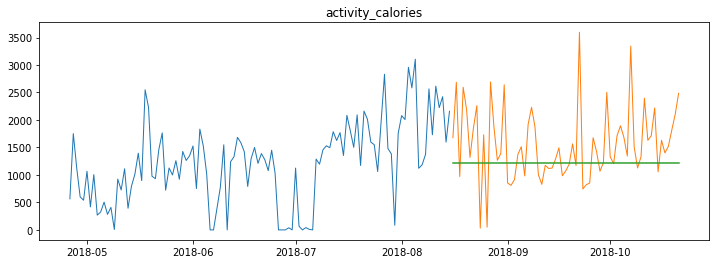

In [21]:
for col in train.columns:
    plot_and_eval(train, validate, yhat_df, col)

#### Evaluate
Evaluate using rmse for each variable in a dataframe that we will update with other models
- `append_eval_df`: This function will store rmse in the eval_df for comparison purposes.

In [22]:
for col in train.columns:
    eval_df = append_eval_df(eval_df, validate, yhat_df, model_type = 'simple_average', 
                             target_var = col)

---
### Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

#### Make Predictions
- `moving_avg`: This function stores 30 day Moving Average in a dictionary. Keys are target variables, values are the 30 day Moving Average.
- `make_predictions`: This function creates yhat_df, the dataframe that contains the predictions on the validate dataset.

In [23]:
d = moving_avg(train)
yhat_df = make_predictions(d, validate)
yhat_df.head(2)

calories_burned     steps  distance  floors  minutes_sedentary  \
date                                                                         
2018-08-16          3774.33  10650.63      5.02    12.0              797.2   
2018-08-17          3774.33  10650.63      5.02    12.0              797.2   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-08-16                   218.4                  18.83   
2018-08-17                   218.4                  18.83   

            minutes_very_active  activity_calories  
date                                                
2018-08-16                45.63            1872.93  
2018-08-17                45.63            1872.93

#### Plot Actual vs. Predicted Values
For each target variable
- `plot_and_eval`: This function will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
- `evaluate`: This function will compute the RMSE for each model.

calories_burned -- RMSE: 732


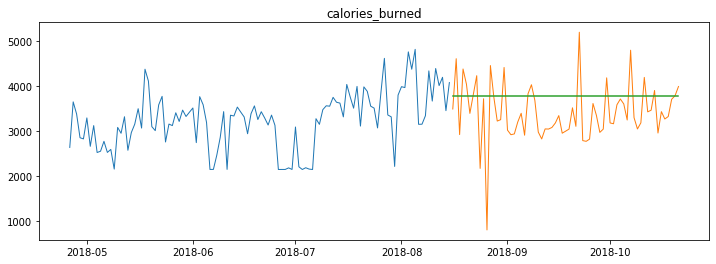

steps -- RMSE: 4425


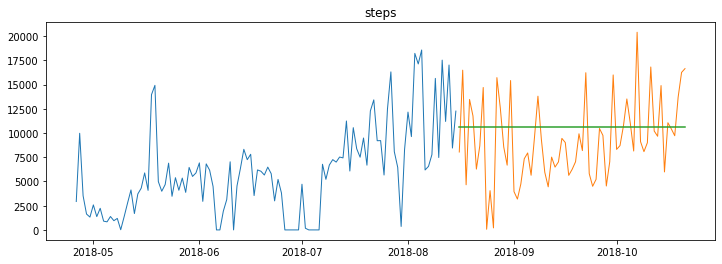

distance -- RMSE: 2


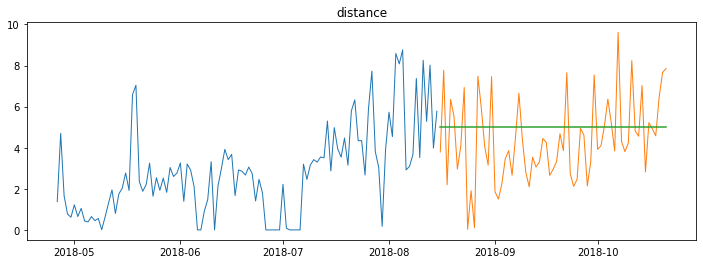

floors -- RMSE: 30


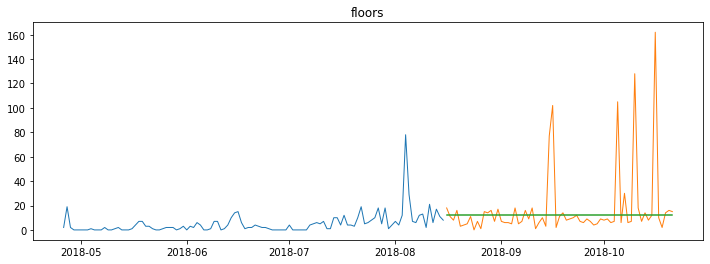

minutes_sedentary -- RMSE: 166


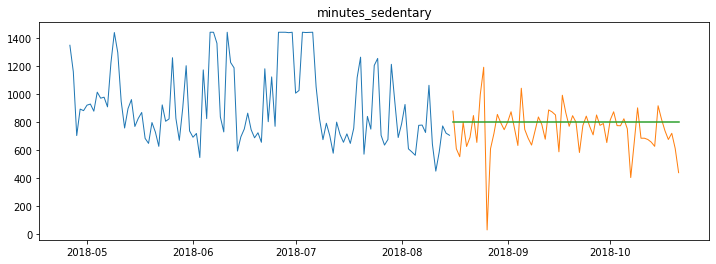

minutes_lightly_active -- RMSE: 66


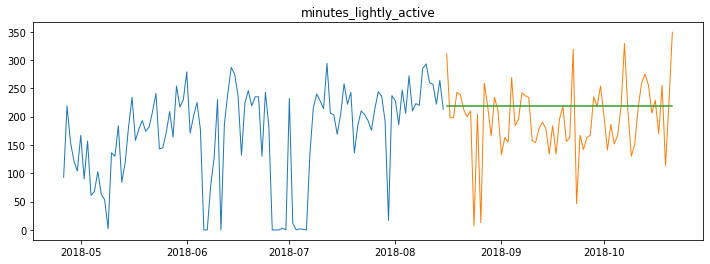

minutes_fairly_active -- RMSE: 16


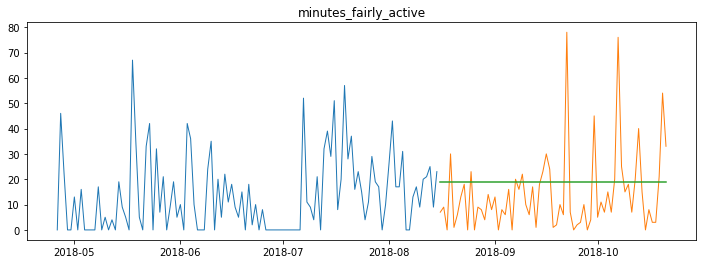

minutes_very_active -- RMSE: 34


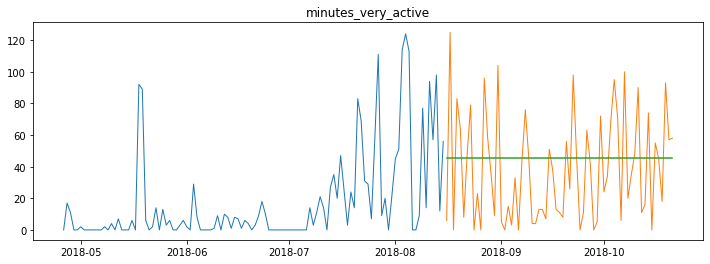

activity_calories -- RMSE: 736


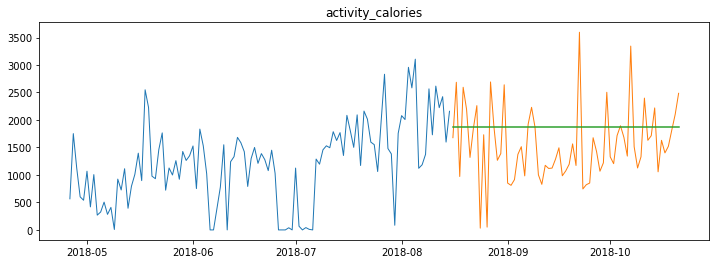

In [24]:
for col in train.columns:
    plot_and_eval(train, validate, yhat_df, col)

#### Evaluate
Evaluate using rmse for each variable in a dataframe that we will update with other models
- `append_eval_df`: This function will store rmse in the eval_df for comparison purposes.

In [25]:
for col in train.columns:
    eval_df = append_eval_df(eval_df, validate, yhat_df, model_type = '30d_moving_avg', 
                             target_var = col)

## Complex Models
---

In [26]:
from model import holts, prev_cycle

### Holt's Linear Trend

Exponential smoothing applied to both the average and the trend (slope).

- α / smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.
- β / smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values.

#### Seasonal Decomposition

First, let's take a look at the seasonal decomposition for each target.

calories_burned 



steps 



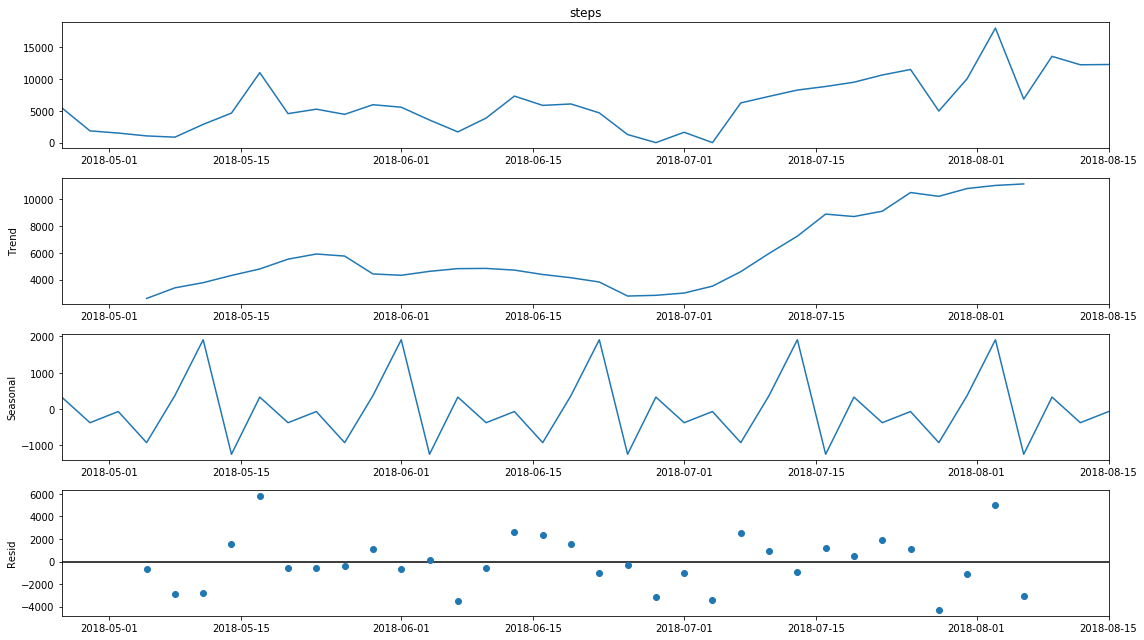

distance 



floors 



minutes_sedentary 



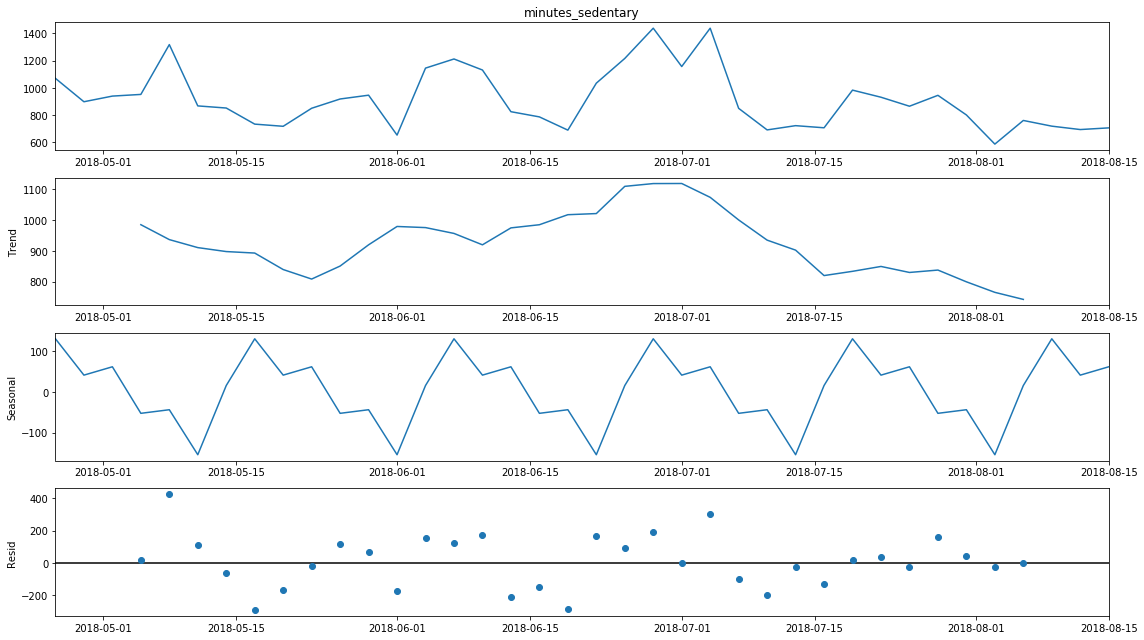

minutes_lightly_active 



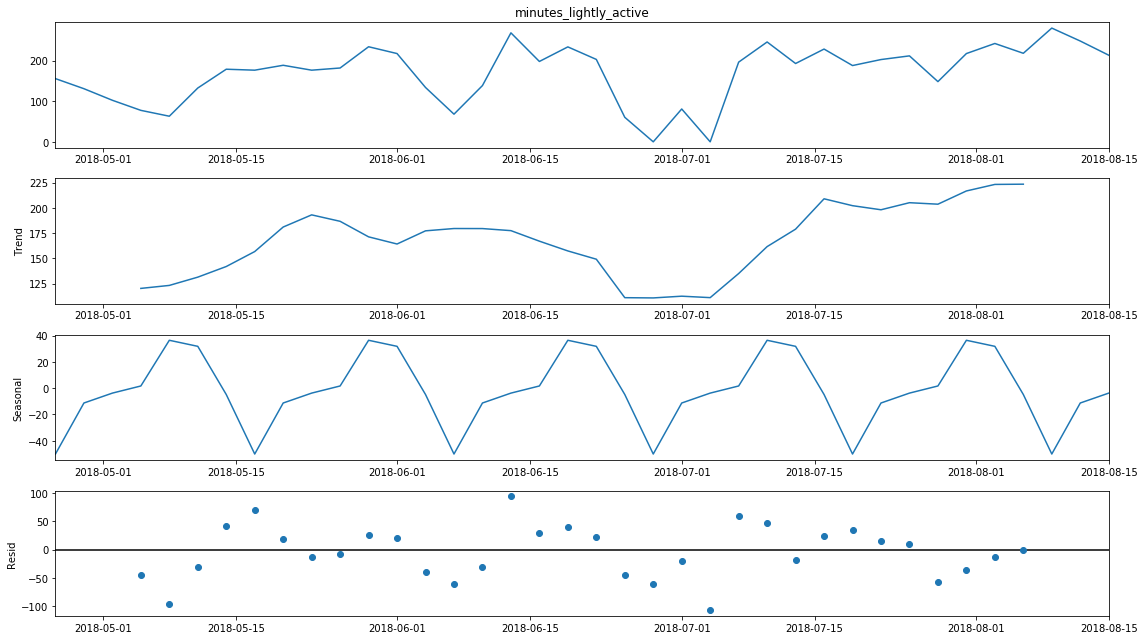

minutes_fairly_active 



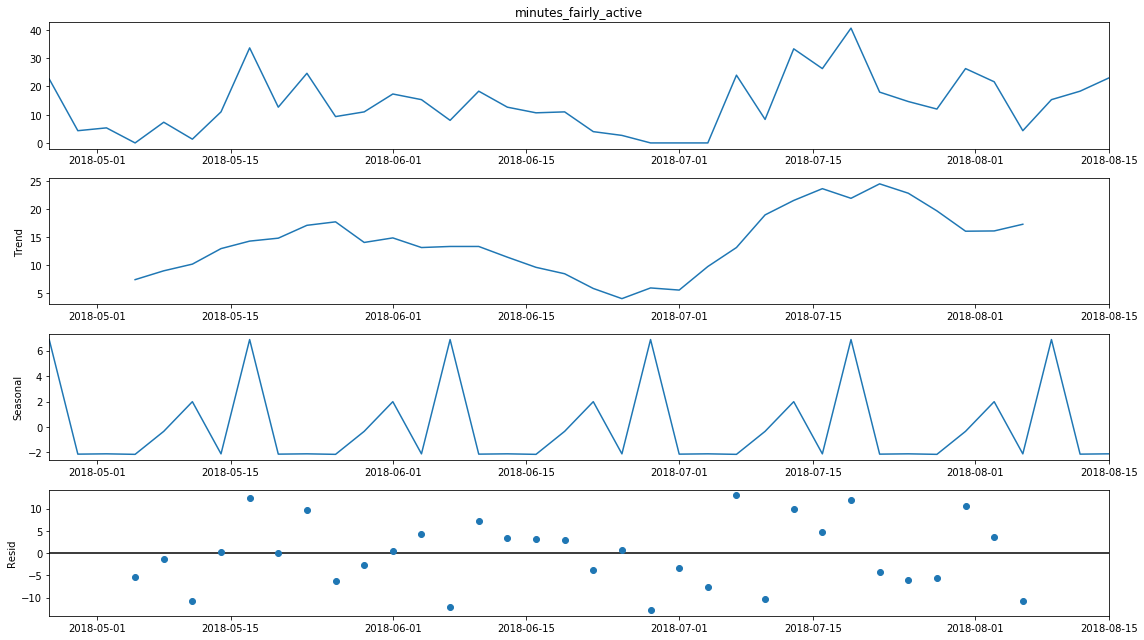

minutes_very_active 



activity_calories 



In [27]:
import statsmodels.api as sm

for col in train.columns:
    print(col,'\n')
    _ = sm.tsa.seasonal_decompose(train[col].resample('3d').mean()).plot()
    plt.show()

#### Make Predictions
Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions.

Holt:

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)

fit:

- smoothing_level (α): value between (0,1)
- smoothing_slope (β): value between (0,1)

`holts`: This function sets default parameters for Holt's model. yhat_df is returned and makes predictions based on model.

In [28]:
yhat_df = holts(train, validate, yhat_df)
yhat_df.head(2)

calories_burned     steps  distance  floors  minutes_sedentary  \
date                                                                         
2018-08-16          3854.93  11408.37      5.54   12.51             735.21   
2018-08-17          3855.15  11408.81      5.55   12.51             735.11   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-08-16                  232.86                  17.34   
2018-08-17                  232.87                  17.35   

            minutes_very_active  activity_calories  
date                                                
2018-08-16                56.76            1974.96  
2018-08-17                57.08            1975.10

#### Plot Actual vs. Predicted Values
For each target variable
- `plot_and_eval`: This function will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
- `evaluate`: This function will compute the RMSE for each model.

calories_burned -- RMSE: 775


steps -- RMSE: 4716


distance -- RMSE: 2


floors -- RMSE: 30


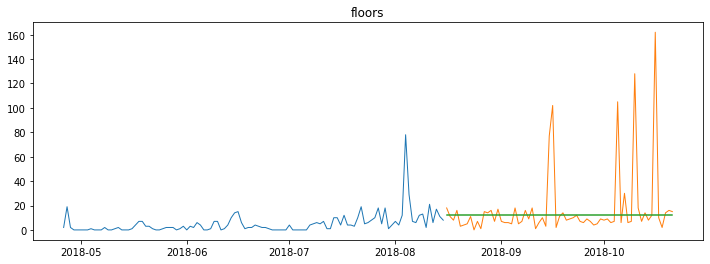

minutes_sedentary -- RMSE: 158


minutes_lightly_active -- RMSE: 72


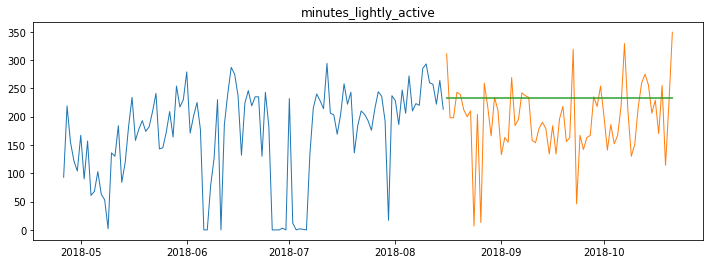

minutes_fairly_active -- RMSE: 16


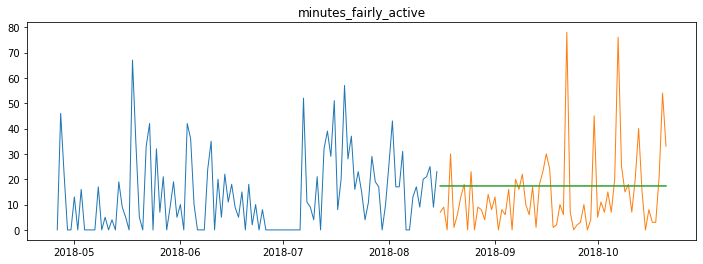

minutes_very_active -- RMSE: 40


activity_calories -- RMSE: 786


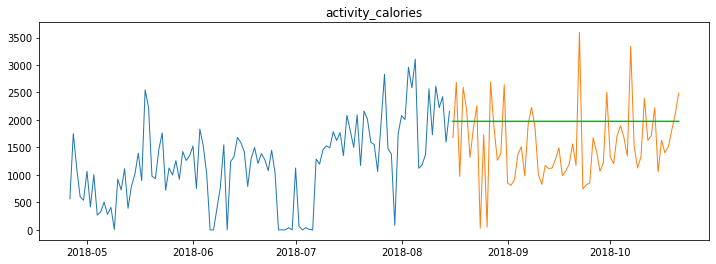

In [29]:
for col in train.columns:
    plot_and_eval(train, validate, yhat_df, col)

#### Evaluate
Evaluate using rmse for each variable in a dataframe that we will update with other models
- `append_eval_df`: This function will store rmse in the eval_df for comparison purposes.

In [30]:
for col in train.columns:
    eval_df = append_eval_df(eval_df, validate, yhat_df, model_type = 'holts', 
                             target_var = col)

---
### Previous Cycle

Use a bi-weekly cycle to predict for the next two weeks.

#### Re-split Data

In [31]:
train2 = df.loc[:'2018-11-09']
validate2 = df.loc['2018-11-09':'2018-11-22']
test2 = df.loc['2018-11-23':'2018-12-06']

print(train2.shape)
print(validate2.shape)
print(test2.shape)

(198, 9)
(14, 9)
(14, 9)


#### Make Predictions
- `prev_cycle`: This function makes the last two weeks from train the predictions for the next two weeks.

In [32]:
yhat_df = prev_cycle(train2, validate2)
yhat_df.head(2)

calories_burned     steps  distance     floors  minutes_sedentary  \
date                                                                            
2018-11-09      4003.184783  15085.75  7.115054  18.831522         615.771739   
2018-11-10      4538.184783  20982.75  9.895054   9.831522         603.771739   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-11-09              216.298913              29.103261   
2018-11-10              246.298913              53.103261   

            minutes_very_active  activity_calories  
date                                                
2018-11-09            89.717391        2302.815217  
2018-11-10           118.717391        2955.815217

#### Plot Actual vs. Predicted Values
For each target variable
- `plot_and_eval`: This function will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
- `evaluate`: This function will compute the RMSE for each model.

calories_burned -- RMSE: 543


steps -- RMSE: 5640


distance -- RMSE: 3


floors -- RMSE: 55


minutes_sedentary -- RMSE: 138


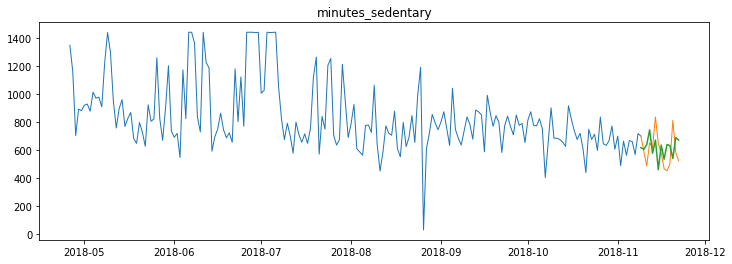

minutes_lightly_active -- RMSE: 74


minutes_fairly_active -- RMSE: 23


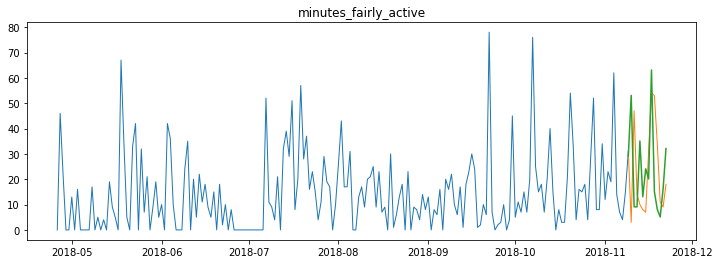

minutes_very_active -- RMSE: 47


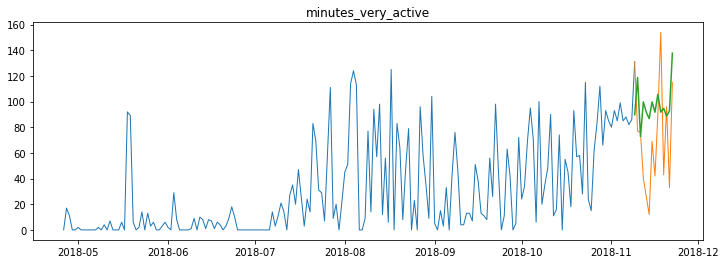

activity_calories -- RMSE: 637


In [33]:
for col in train.columns:
    plot_and_eval(train2, validate2, yhat_df, col)

#### Evaluate
Evaluate using rmse for each variable in a dataframe that we will update with other models
- `append_eval_df`: This function will store rmse in the eval_df for comparison purposes.

In [34]:
for col in train.columns:
    eval_df = append_eval_df(eval_df, validate2, yhat_df, model_type = 'prev_2wks', 
                             target_var = col)

## Determine Best Model to Test
`final_eval`: This function takes the eval_df to helo determine which model is best to move on to 'TEST' by grouping by target variable and model type to find lowest rmse for each.

In [35]:
from model import final_eval, final_plot, model_improvement

In [36]:
final_eval = final_eval(eval_df)
final_eval

rmse
target_var             model_type                 
activity_calories      30d_moving_avg        736.0
                       holts                 786.0
                       last_observed_value   897.0
                       prev_2wks             637.0
                       simple_average        746.0
calories_burned        30d_moving_avg        732.0
                       holts                 775.0
                       last_observed_value   921.0
                       prev_2wks             543.0
                       simple_average        658.0
distance               30d_moving_avg          2.0
                       holts                   2.0
                       last_observed_value     2.0
                       prev_2wks               3.0
                       simple_average          3.0
floors                 30d_moving_avg         30.0
                       holts                  30.0
                       last_observed_value    31.0
                       prev_2wks              55.0
                       simple_average         32.0
minutes_fairly_active  30d_moving_avg         16.0
                       holts                  16.0
                       last_observed_value    18.0
                       prev_2wks              23.0
                       simple_average         16.0
minutes_lightly_active 30d_moving_avg         66.0
                       holts                  72.0
                       last_observed_value    64.0
                       prev_2wks              74.0
                       simple_average         68.0
minutes_sedentary      30d_moving_avg        166.0
                       holts                 158.0
                       last_observed_value   163.0
                       prev_2wks             138.0
                       simple_average        233.0
minutes_very_active    30d_moving_avg         34.0
                       holts                  40.0
                       last_observed_value    38.0
                       prev_2wks              47.0
                       simple_average         39.0
steps                  30d_moving_avg       4425.0
                       holts                4716.0
                       last_observed_value  5156.0
                       prev_2wks            5640.0
                       simple_average       5356.0

#### Compare Average RMSE among All Target Variables

In [37]:
final_eval.groupby('model_type').rmse.mean().sort_values()

model_type
30d_moving_avg         689.666667
holts                  732.777778
simple_average         794.555556
prev_2wks              795.555556
last_observed_value    810.000000
Name: rmse, dtype: float64

<div class="alert alert-block alert-info">
    <b>Modeling Takewaways</b>:
    <li>30 day moving average has lowest average RMSE among all target features</li>

---
## Model Evaluation
- Test 30 Day Moving Avg model on out of sample data

#### Resample to combine Train and Validate
- Using to predict on test

In [38]:
train_size = int(len(df)*.8)
test_size = int(len(df) - train_size)

train = df[:train_size]
test = df[train_size:]

train.shape, test.shape

((180, 9), (45, 9))

#### Make Predictions
Use the model to predict on validate data
- `moving_avg`: This function stores 30 day Moving Average in a dictionary. Keys are target variables, values are the 30 day Moving Average.
- `make_predictions`: This function creates yhat_df, the dataframe that contains the predictions on the validate dataset.

In [39]:
d = moving_avg(train)
yhat_df = make_predictions(d, test)
yhat_df.head(3)

calories_burned    steps  distance  floors  minutes_sedentary  \
date                                                                        
2018-10-23          3431.73  10466.2      4.95   21.87             729.37   
2018-10-24          3431.73  10466.2      4.95   21.87             729.37   
2018-10-25          3431.73  10466.2      4.95   21.87             729.37   

            minutes_lightly_active  minutes_fairly_active  \
date                                                        
2018-10-23                  200.07                  15.93   
2018-10-24                  200.07                  15.93   
2018-10-25                  200.07                  15.93   

            minutes_very_active  activity_calories  
date                                                
2018-10-23                42.87             1600.4  
2018-10-24                42.87             1600.4  
2018-10-25                42.87             1600.4

#### Plot Actual vs. Predicted Values
For each target variable
- `final_plot`: This function will plot the final model and also plot train and test values with the predicted values in order to compare performance on test.

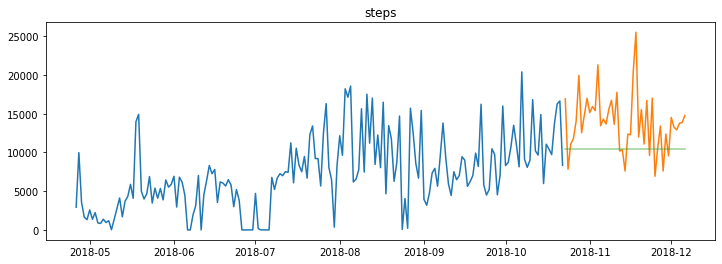

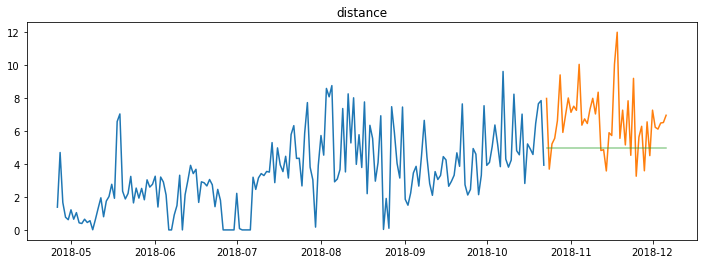

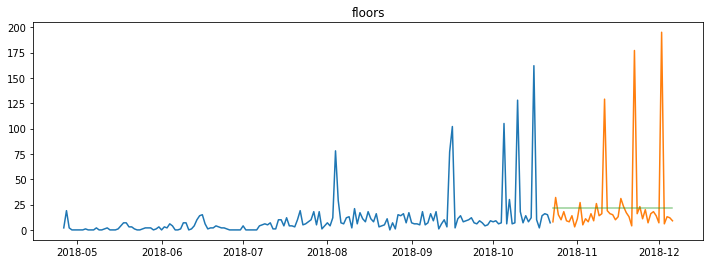

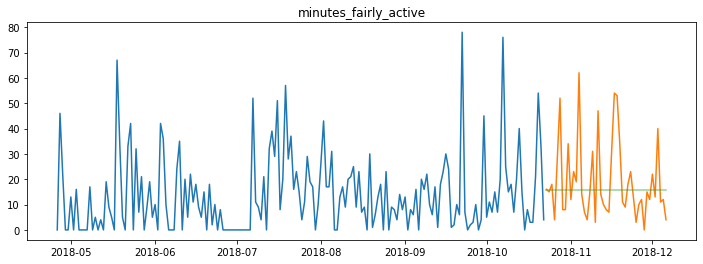

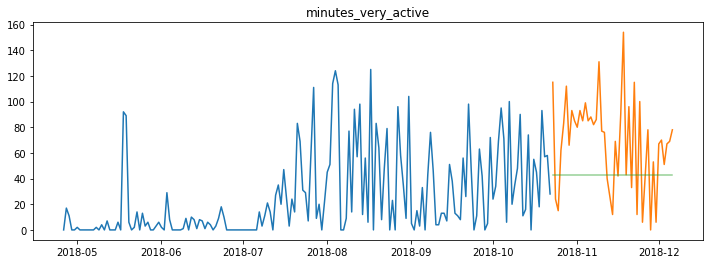

In [40]:
for col in train.columns:
    final_plot(train, test, yhat_df, col)

### Evaluate
Evaluate using rmse for each variable in a dataframe that we will update with other models
- `append_eval_df`: This function will store rmse in the eval_df for comparison purposes.

#### DataFrame of the test RMSE

In [41]:
final_eval = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
for col in train.columns:
    final_eval = append_eval_df(final_eval, test, yhat_df, model_type = '30d_moving_avg', 
                             target_var = col)
final_eval

model_type              target_var    rmse
0  30d_moving_avg         calories_burned   555.0
1  30d_moving_avg                   steps  5012.0
2  30d_moving_avg                distance     2.0
3  30d_moving_avg                  floors    39.0
4  30d_moving_avg       minutes_sedentary   130.0
5  30d_moving_avg  minutes_lightly_active    56.0
6  30d_moving_avg   minutes_fairly_active    16.0
7  30d_moving_avg     minutes_very_active    43.0
8  30d_moving_avg       activity_calories   676.0

#### DataFrame of the validate RMSE

In [42]:
eval_df[eval_df.model_type == '30d_moving_avg']

model_type              target_var    rmse
18  30d_moving_avg         calories_burned   732.0
19  30d_moving_avg                   steps  4425.0
20  30d_moving_avg                distance     2.0
21  30d_moving_avg                  floors    30.0
22  30d_moving_avg       minutes_sedentary   166.0
23  30d_moving_avg  minutes_lightly_active    66.0
24  30d_moving_avg   minutes_fairly_active    16.0
25  30d_moving_avg     minutes_very_active    34.0
26  30d_moving_avg       activity_calories   736.0

#### Model's Final Performance
`model_improvement`: This function uses Last Observed Value as a baseline, then calculates the final model's % improvement in performance.

In [43]:
model_improvement(eval_df, final_eval)

The % improvement for our model is 10.44%


---
# Predict Missing Two Weeks
> Predict the two weeks of data after the last entry (2018-12-06)

#### Make Predictions
`predict_plot`: This function plots the full data set with the prediction of next two weeks based on the 30 day moving average model.

In [44]:
# Adding two weeks to the end of test since index is sorted by date
yhat_df.index = test.index + pd.Timedelta('2W')

In [45]:
# Filtering so that that yhat is exactly 2 weeks after last day in data
yhat_df = yhat_df[-14:]

#### Plot Predictions

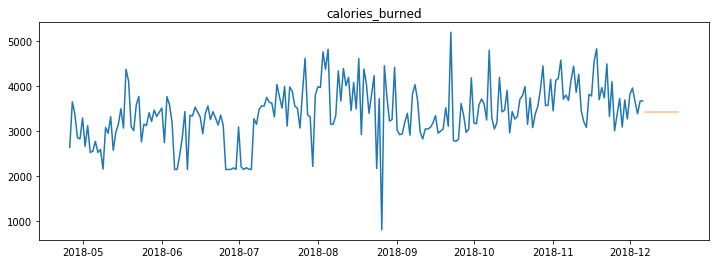

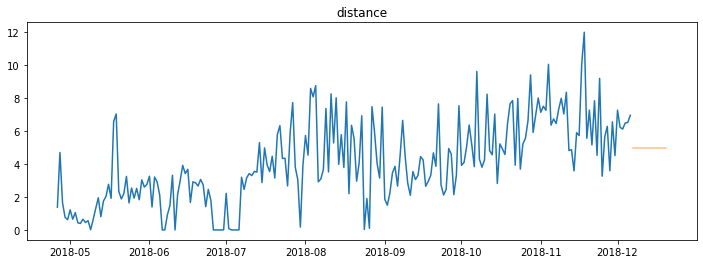

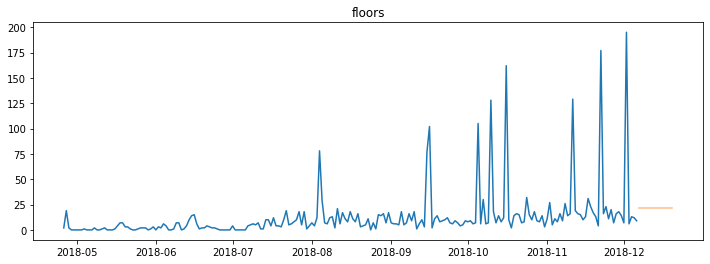

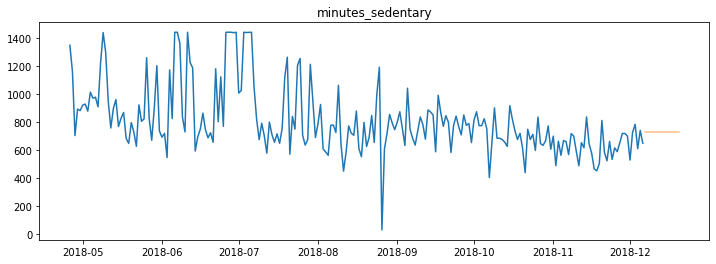

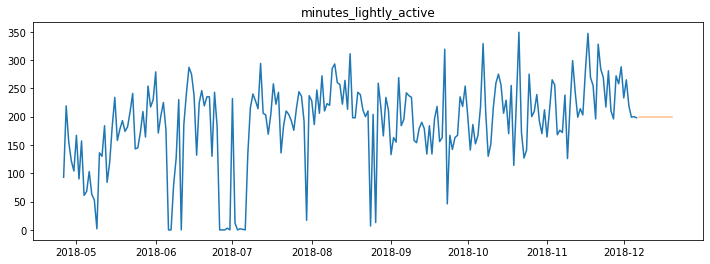

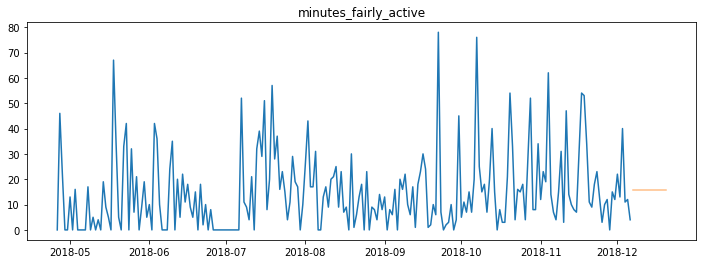

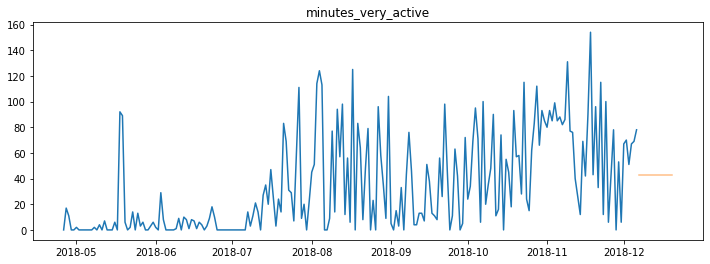

In [46]:
from model import predict_plot

for col in df.columns:
    predict_plot(df, yhat_df, col)

#### Create CSV of the next 2 week predictions

In [47]:
# yhat_df.to_csv('predictions_next_2wks.csv')

---
# Conclusions

<div class="alert alert-block alert-info">
    <li><b>Clean the current data set to obtain workable data</b>: I used a spreadsheet to clean up the data initially to be read into a DataFrame from a CSV. I cleaned the data and preprocessed it for exploration and modeling.</li>
    <li><b>Draw conclusions on the individual who wore the fitness tracker</b>: This person is a weekend warrior. They stay active on weekends and probably just focus on work duting the week. They're most active in the summer which is typical for the vacation season. They may be hiking in the early fall since floors are highest in September.</li>
    <li><b>Make predictions on the two weeks of missing data</b>: We are basing all our predictions on the 30 day rolling average since those predictions have the smallest chance of error.</li></div>

## Next Steps

- There isn't enough data. It's was difficult to see any trends or seaonality with less than a years worth of data. With more data, we can spot long term results.

- The model used were fairly basic. Exploring/testing new and refined models would improve results. Possibly tweaking some of the parameters and trying a prophet model may do some good.